# Aim of the Notebook

**Welcome everyone!**


**In this notebook, I will be dealing with the Mushroom Classification by using Random Forest Classifier, SVM, XGBooster Classifier.**


**For the first step of this notebook, I will work on the EDA of this dataset by using Seaborn and Plotly libraries.**

**For the next step, I will deal with the missing data points -if they exist -, and then encode the dataset for the data pre-processing step.**

**Finally, I will train 3 different models which are Random Forest Classifier, SVM, and XGBoost Classifier.**

**I am open to feedback and suggestions, feel free to comment your feedback and suggestions on the comment section or contact me.**

**So, let's get started!**

# Importing the Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import plotly.graph_objects as go
from xgboost import XGBClassifier

from sklearn import svm
import plotly.figure_factory as ff
import warnings
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mushroom-classification/mushrooms.csv


# Reading the Dataset

In [2]:
data = pd.read_csv("../input/mushroom-classification/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**As seen from above, our dataset has 23 columns. Each column has a different feature of the mushrooms which are the column names of the dataset.**

# Exploratory Data Analysis

**In the EDA step, I will visualize each feature by its class distribution. The "class" refers that the information of this mushroom is edible or poisonous.**

# Mushroom Class

In [3]:
labels = ['Edible', 'Poisonous']
values = [data.describe()['class']['freq'], data.describe()['class']['count']-data.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

**As seen from the figure above, the red part represents that the percentage of the poisonous mushrooms in the dataset. The green part represents that the percentage of edible mushrooms. The percentages of these classes are pretty close to each other. From now on, I will represent the red color for the poisonous class and green for the edible class of the mushrooms.**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

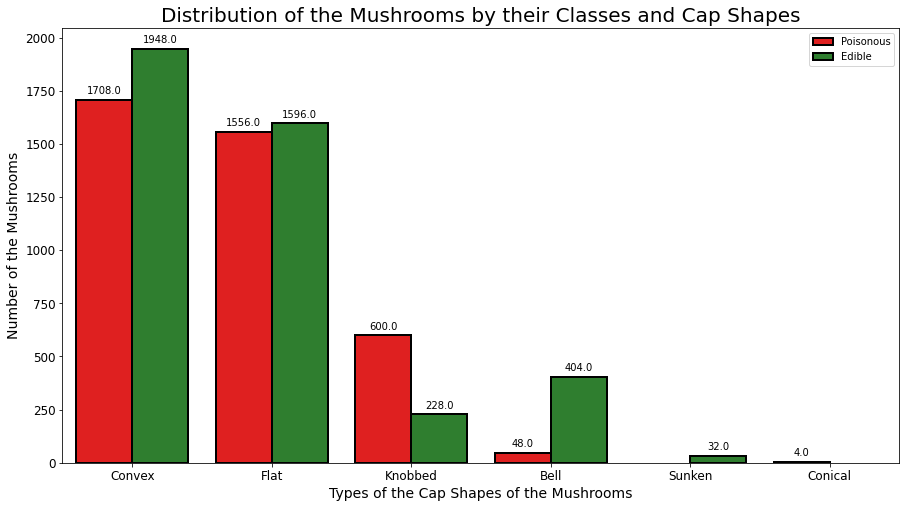

In [4]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='cap-shape',
                      hue='class',
                      order=data['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Cap Shapes. The x-axis represents that the Types of the Cap Shapes of the Mushrooms and the y-axis represents that the Number of the Mushrooms. According to this graph, the Convex Cap Shape is the most frequent. The Edible and Poisonous class mushrooms are pretty close to each other for the Convex and the Flat type. In contrast, for the following types which are Kobbed and Bell, the class types are pretty imbalanced distributed. The Sunken and the Conical types are completely edible.**

# Cap Surfaces
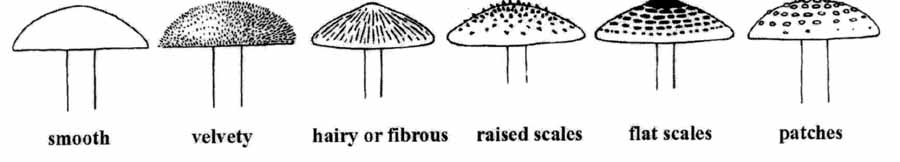

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surfaces')

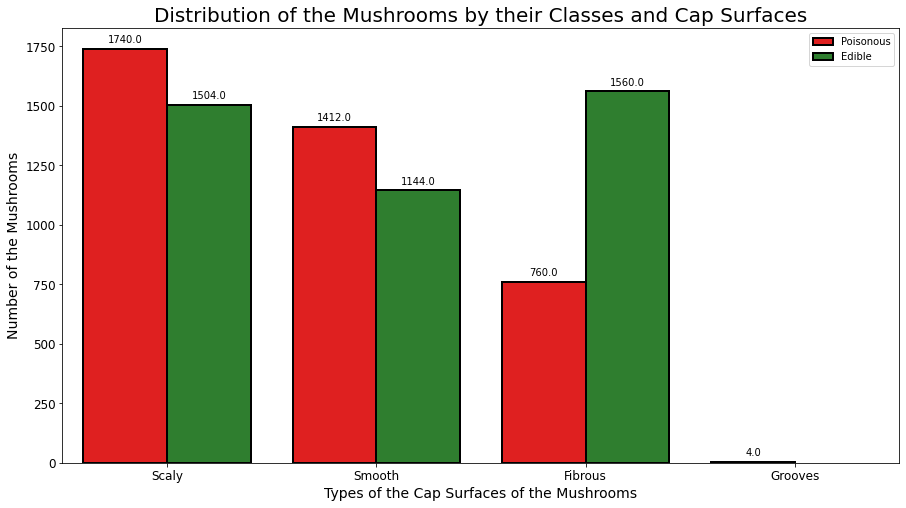

In [5]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='cap-surface',
                      hue='class',
                      order=data['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Cap Surfaces. The x-axis represents that the Types of the Cap Surfaces of the Mushrooms and the y-axis represents that the Number of the Mushrooms. As seen from the figure, the Scaly and Smooth types are high probability poisonous. In contrast, the Fibrous type is mostly edible.**

# Cap Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Colors')

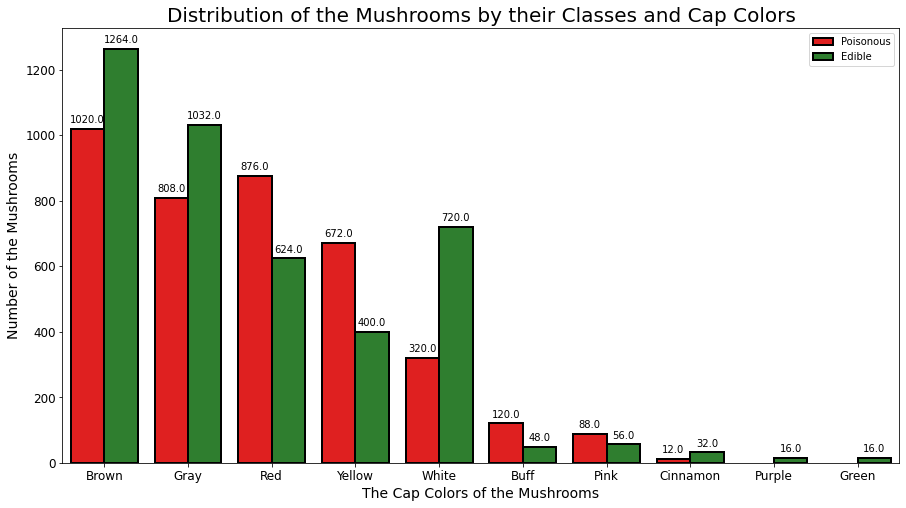

In [6]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='cap-color',
                      hue='class',
                      order=data['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Cap Colors. The x-axis represents that The Cap Colors of the Mushrooms and the y-axis represents that the Number of the Mushrooms. According to this graph, the Edible and Poisonous class mushrooms are pretty close to each other for Brown, Gray, and Red cap colors. The White cap-colored mushrooms are highly edible. Purple and Green cape-colored mushrooms have no poisonous class.**

# Bruises

Text(0.5, 1.0, 'Distribution of the Mushrooms by Classes and Bruises')

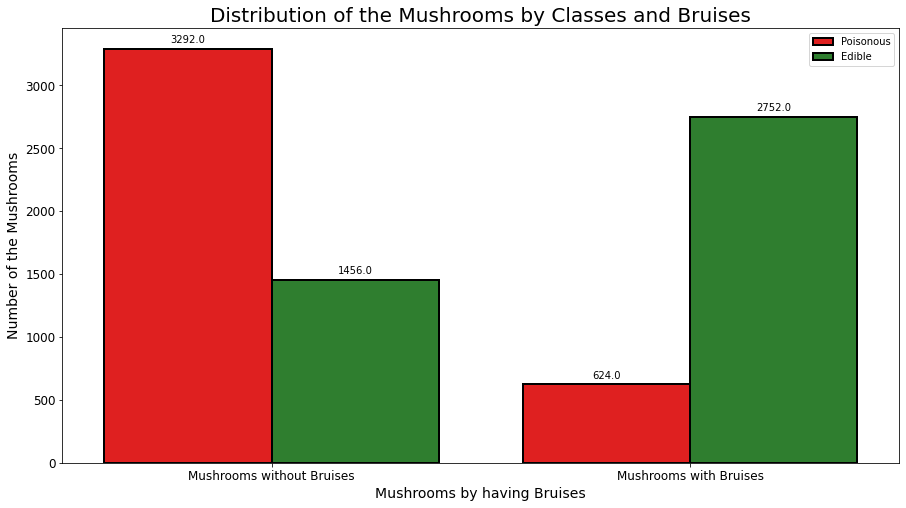

In [7]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='bruises',
                      hue='class',
                      order=data['bruises'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Mushrooms by having Bruises', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Bruises', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Bruises. The x-axis represents that mushrooms by having Bruises and, the y-axis represents that the Number of Mushrooms. As you can see from the graph above, Mushrooms without Bruises are high frequently poisonous. In contrast, the Mushrooms with the Bruises are highly edible.**

# Odor

Text(0.5, 1.0, 'Distribution of the Mushrooms by Classes and Odor')

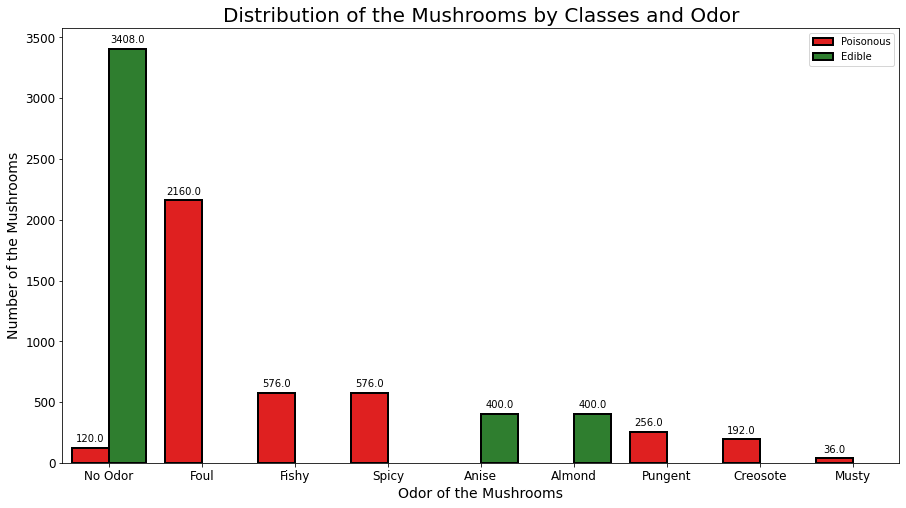

In [8]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='odor',
                      hue='class',
                      order=data['odor'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Odor', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Odors. The x-axis represents that the Odor of the Mushrooms and, the y-axis represents that the Number of Mushrooms. According to the graph above, mushrooms with no odor are highly safe for humans. But the mushrooms with the Foul, Fishy, and Spicy odor are high frequently poisonous. The mushrooms with the Anise and Almond odor have no poisonous class.**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Attachments')

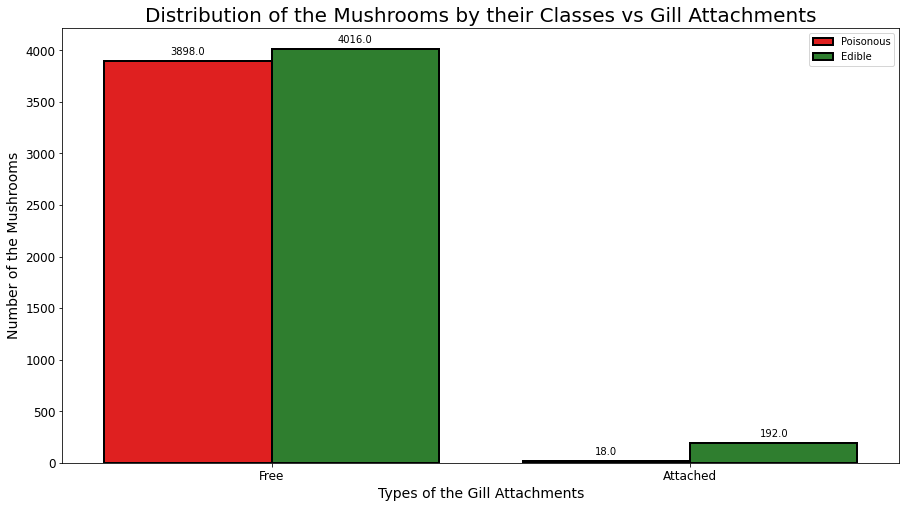

In [9]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-attachment',
                      hue='class',
                      order=data['gill-attachment'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Attachments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Attachments', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Gill Attachments. The x-axis represents that the Types of the Gill Attachments and, the y-axis represents that the Number of Mushrooms. The dataset has high frequently Free type gill attachments. According to this graph, the Free type gill attachments are approximately equally distributed. In contrast, the Attached type gill attachments are most frequently edible.**

# Gill Spacing
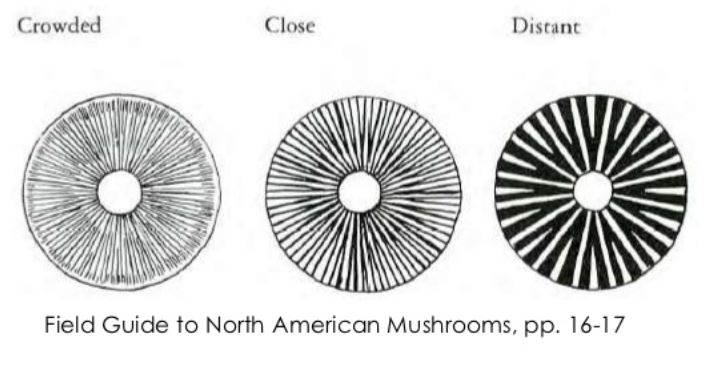

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Spacing')

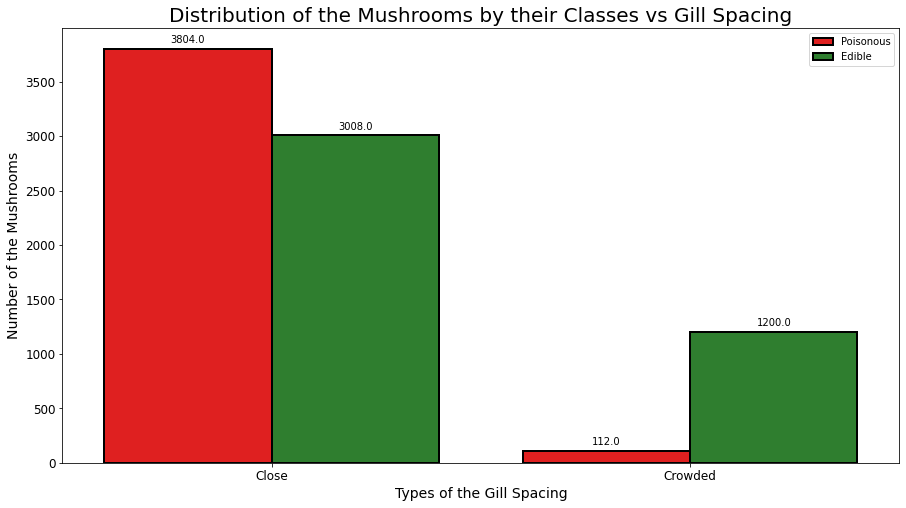

In [10]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-spacing',
                      hue='class',
                      order=data['gill-spacing'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Close', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Spacing', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Spacing', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Gill Spacing. The x-axis represents that the Types of the Gill Spacing and, the y-axis represents that the Number of Mushrooms. According to this figure, the Crowded type gill spacing is high frequently edible. In contrast, we cannot say the same thing for the Close-type gill spacing mushrooms. Their class distribution by gill spacing is pretty close to each other.**

# Gill Color

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Colors')

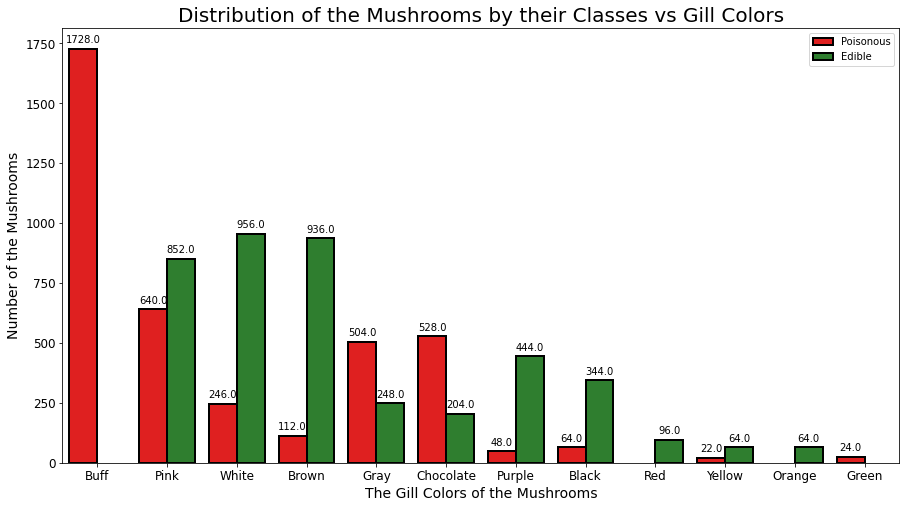

In [11]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill-color',
                      hue='class',
                      order=data['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Colors', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Gill Colors. The x-axis represents that the Types of the Gill Colors and, the y-axis represents that the Number of Mushrooms. As seen from the figure above, the Buff-colored gills are highly poisonous. In contrast, the White, Brown, Purple, Black, and Red gill colors are high frequently edible.**

# Stalk Shape
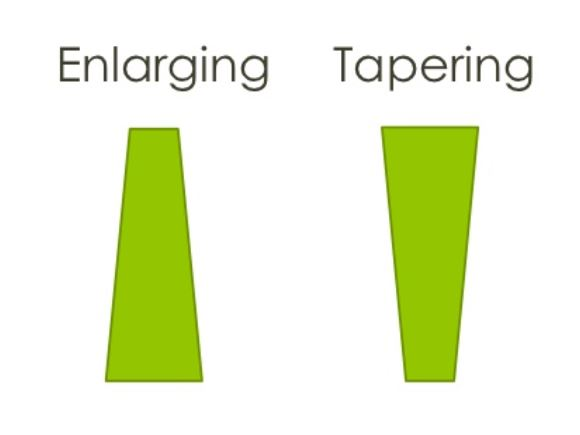

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Shapes')

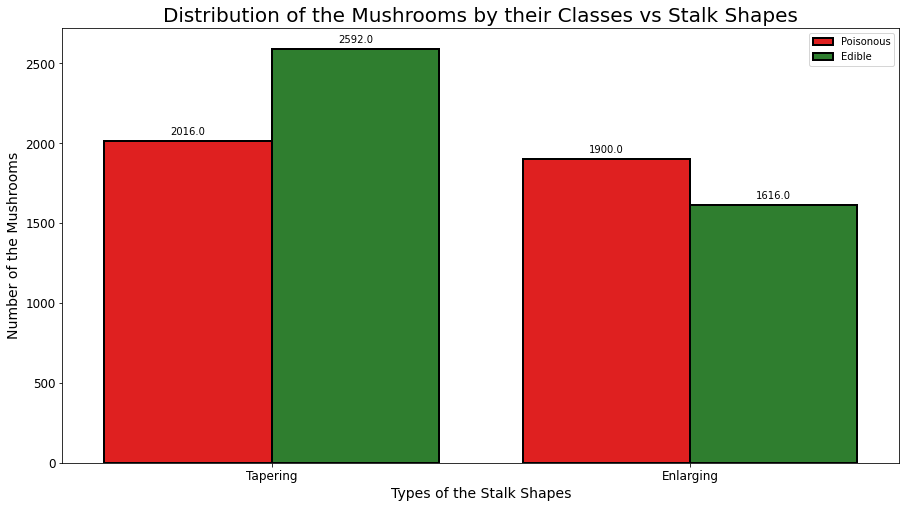

In [12]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-shape',
                      hue='class',
                      order=data['stalk-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Tapering', 'Enlarging'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Shapes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Shapes', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Types of the Stalk Shapes. The x-axis represents that the Types of the Types of the Stalk Shapes and, the y-axis represents that the Number of Mushrooms.**

# Stalk Root

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Root')

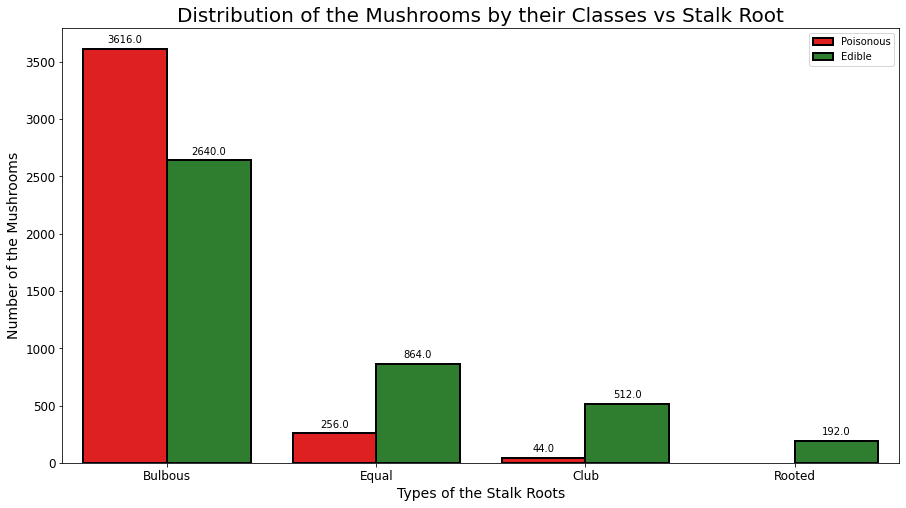

In [13]:
# The stalk-root feature has missing values. I filled the missing values with the most frequent object which is 'b'.
data = data.replace(['?'], 'b')

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-root',
                      hue='class',
                      order=data['stalk-root'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2
                      )

splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Roots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Root', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Types of Stalk Roots. The x-axis represents the Types of Stalk Roots and, the y-axis represents that the Number of Mushrooms. As seen from the figure, most data points are Bulbous-type stalk root. The Equal, Club, and Rooted type stalk roots are highly edible but the Bulbous type stalk root is highly poisonous.**

# Stalk Surface Above and Below Ring

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring')

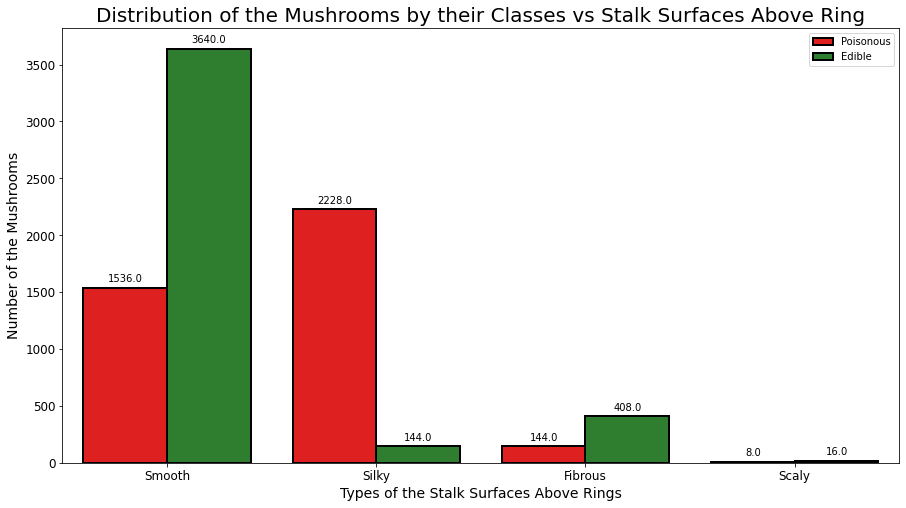

In [14]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-surface-above-ring',
                      hue='class',
                      order=data['stalk-surface-above-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Above Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring', fontsize=20)


**The Figure above represents the Distribution of the Mushrooms by their Classes and Types of Stalk Surfaces Above the Ring. The x-axis represents the Types of Stalk Surfaces Above the Ring and, the y-axis represents that the Number of Mushrooms.**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Surfaces Below Ring')

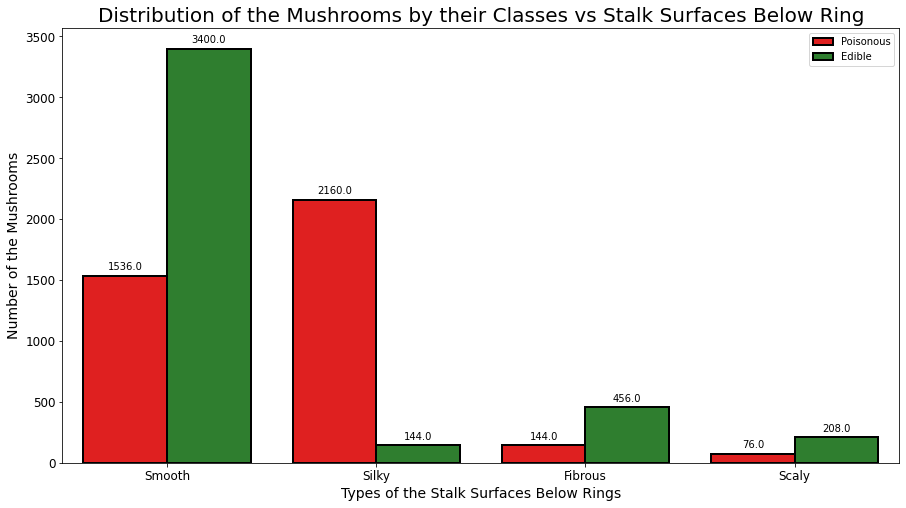

In [15]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-surface-below-ring',
                      hue='class',
                      order=data['stalk-surface-below-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Below Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Below Ring', fontsize=20)


**The Figure above represents the Distribution of the Mushrooms by their Classes and Types of Stalk Surfaces Below the Ring. The x-axis represents the Types of Stalk Surfaces Below the Ring and, the y-axis represents that the Number of Mushrooms.**

# Veil Types
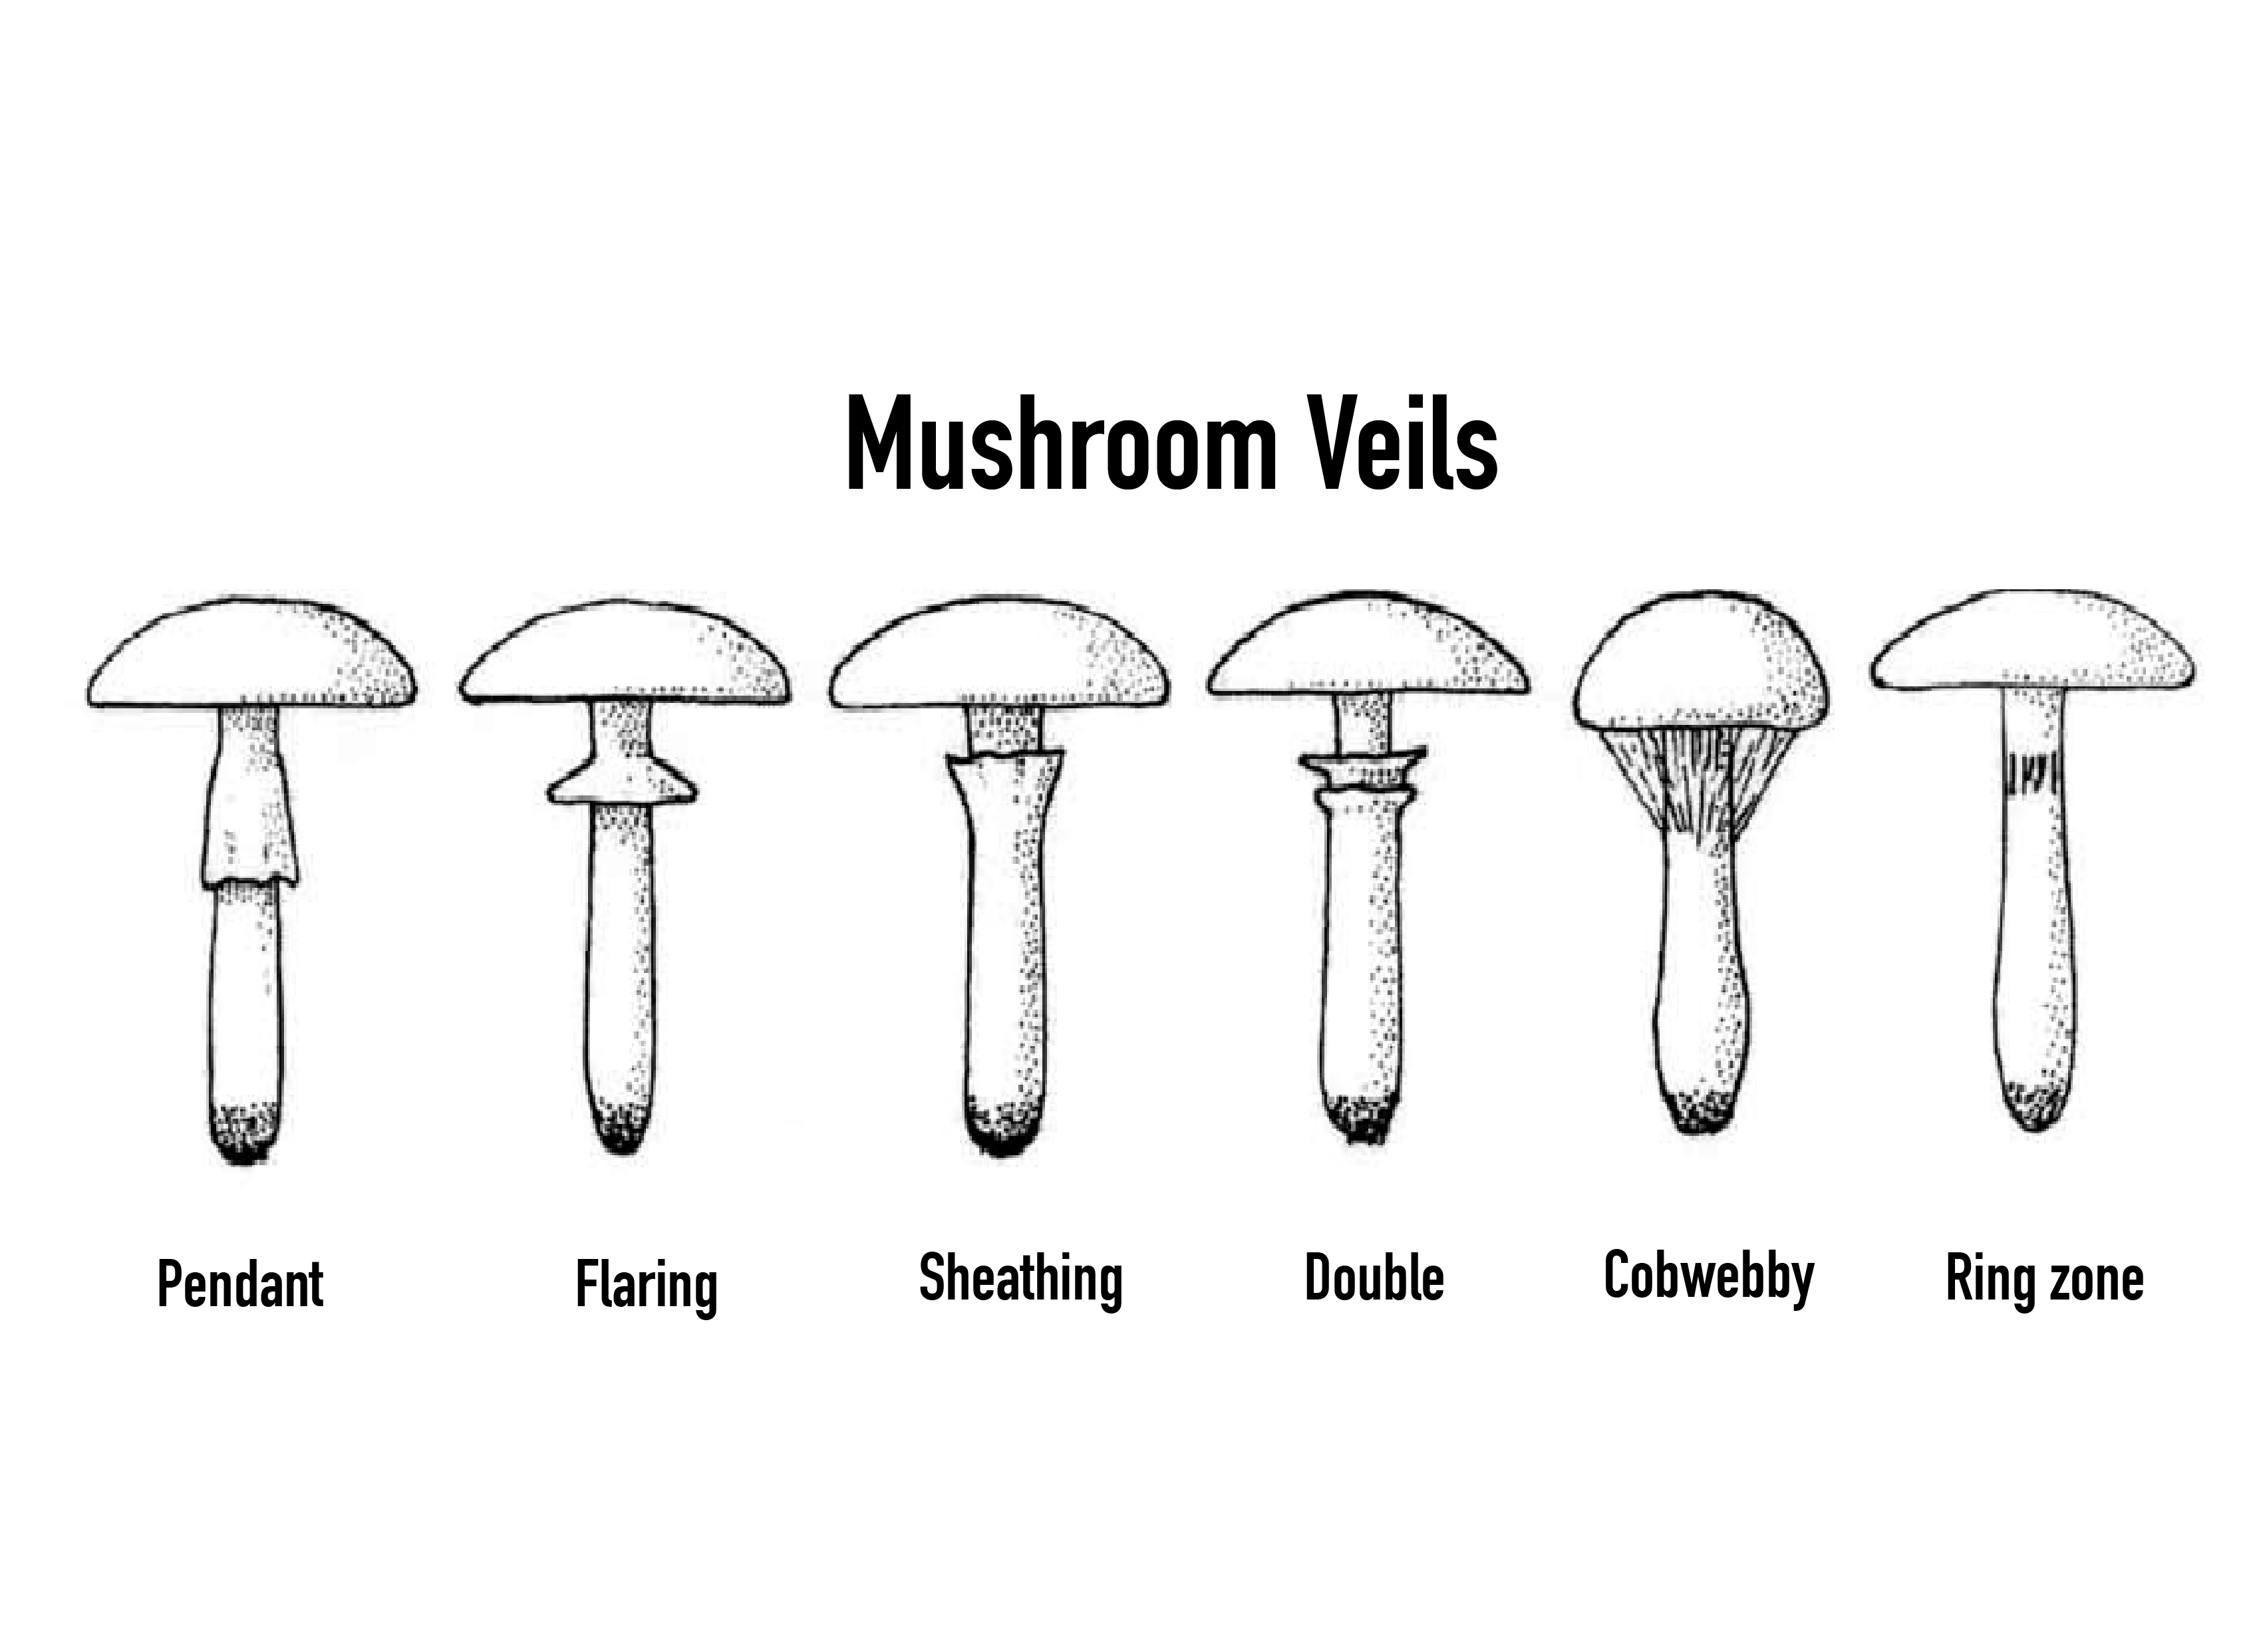

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Veil Types')

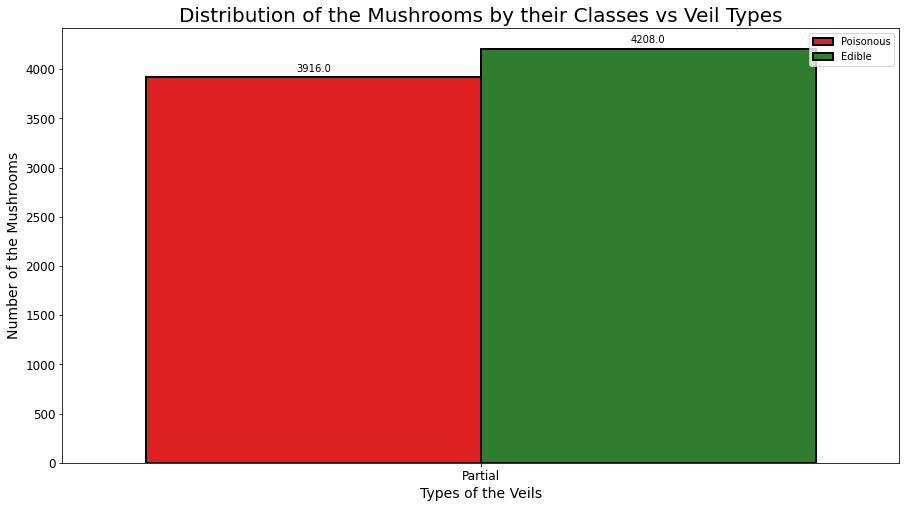

In [16]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='veil-type',
                      hue='class',
                      order=data['veil-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Partial'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Veils', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Veil Types', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Veil Types. The x-axis represents the Veil Types and, the y-axis represents that the Number of Mushrooms. In this dataset, we have only Partial type Veils. As you can see, most of them are edible but the number of the poisonous class mushrooms are pretty close to the edible class of mushrooms.**

# Veil Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Veil Colors')

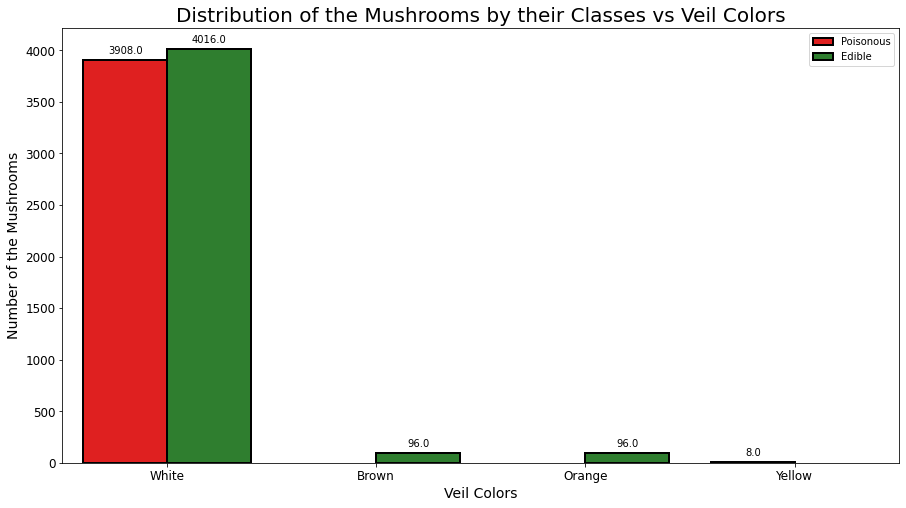

In [17]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='veil-color',
                      hue='class',
                      order=data['veil-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Veil Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Veil Colors', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Veil Colors. The x-axis represents the Veil Colors and, the y-axis represents that the Number of Mushrooms. According to our dataset, most of the mushrooms have White colors. The class distribution of the White-colored Veils is approximately equal. The Brown, Orange, and Yellow Veil-colored mushrooms have no poisonous class.**

# Number of the Rings

In [18]:
x = ['None', 'One', 'Two']
y = ['Poisonous', 'Edible']
z = [[data[data['class'] == 'p']['ring-number'].value_counts()[2],
      data[data['class'] == 'p']['ring-number'].value_counts()[0],
      data[data['class'] == 'p']['ring-number'].value_counts()[1]],
     [0, data[data['class'] == 'e']['ring-number'].value_counts()[0],
      data[data['class'] == 'e']['ring-number'].value_counts()[1]]
     ]

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='magma')
fig.update_layout(title_text='Heatmap of the Mushrooms by their Classes vs Number of the Rings',
                  title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis=dict(
    tickfont=dict(size=15),
),
    yaxis=dict(tickfont=dict(size=15)))
fig.show()

# Ring Types
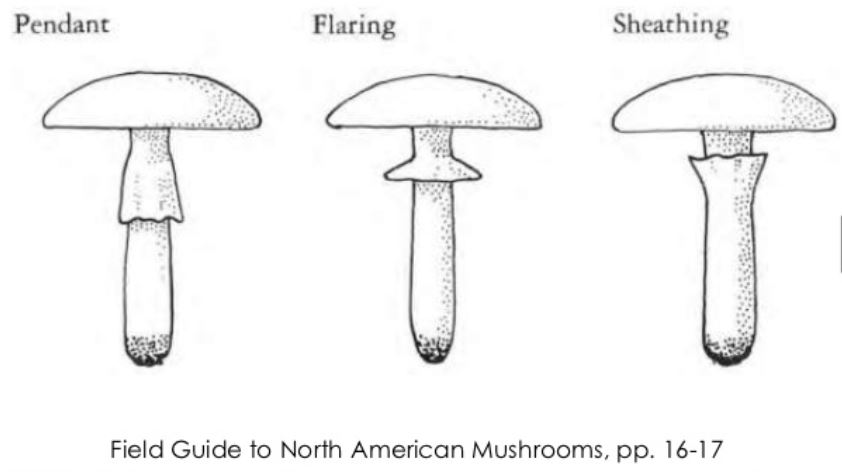

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Ring Types')

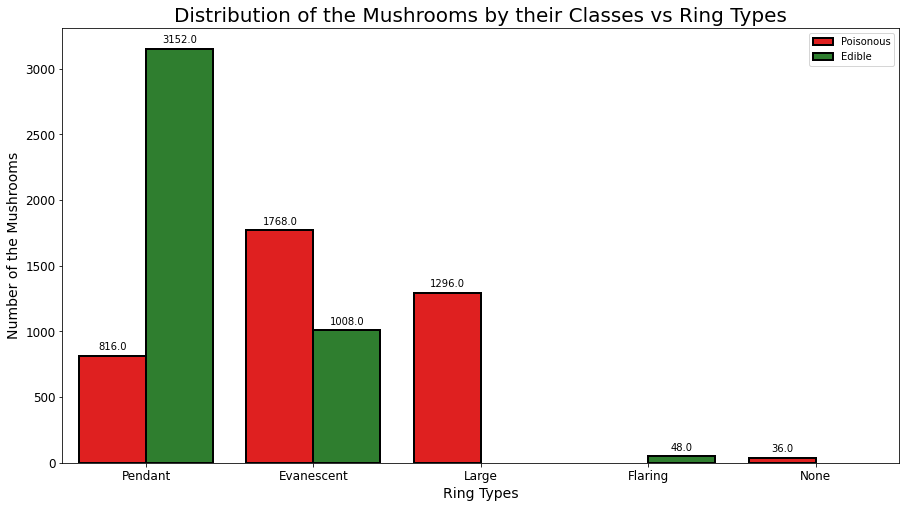

In [19]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='ring-type',
                      hue='class',
                      order=data['ring-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Ring Types', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Ring Types', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Ring Types. The x-axis represents the Ring Types and, the y-axis represents that the Number of Mushrooms. As seen from the graph, the mushrooms with the Pendant type are high frequently edible. In contrast, the mushrooms with the Large type have only the poisonous class.**

# Spore Print Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Spore Print Color')

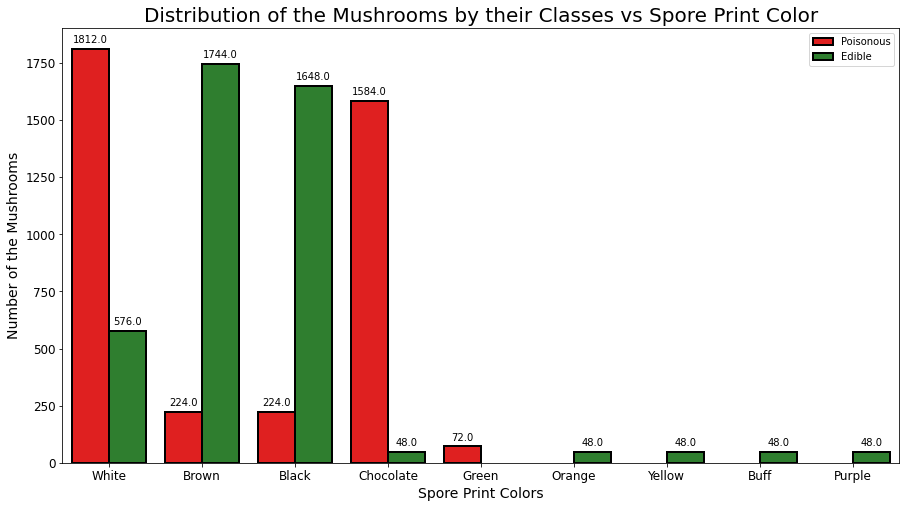

In [20]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='spore-print-color',
                      hue='class',
                      order=data['spore-print-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Spore Print Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Spore Print Color', fontsize=20)


**The Figure above represents the Distribution of the Mushrooms by their Classes and Spore Pring Colors. The x-axis represents the Spore Pring Colors and, the y-axis represents that the Number of Mushrooms. As seen from the figure, the White and Chocolate spore print colored mushrooms are high frequently poisonous. In contrast, the mushrooms with the Brown and Black spore print colors are high frequently edible.**

# Populations

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Populations')

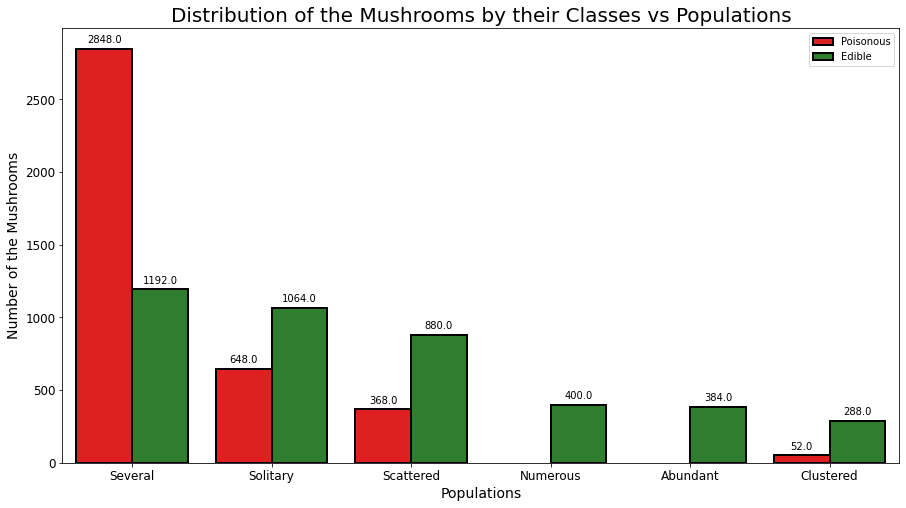

In [21]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='population',
                      hue='class',
                      order=data['population'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Populations', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Classes and Populations. The x-axis represents the Populations and, the y-axis represents that the Number of Mushrooms. According to the graph above, the mushrooms populated as Several types are highly poisonous. In contrast, the mushrooms with Numerous, Abundant, and Clustered populations are pretty edible.**

# Habitats

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Habitats')

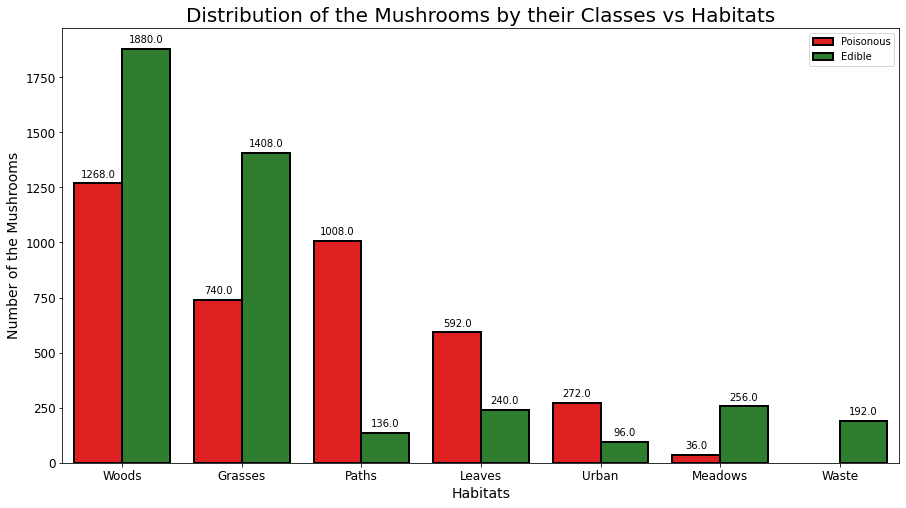

In [22]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='habitat',
                      hue='class',
                      order=data['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Habitats', fontsize=20)

**The Figure above represents the Distribution of the Mushrooms by their Habitats and Populations. The x-axis represents the Habitats and, the y-axis represents that the Number of Mushrooms.**

# Data Pre-Process

**In this step, I will check for the missing data points and then, encode the string data types. According to dataset exploration, all columns have string-type data.**

In [23]:
count_NaN = data.isna().sum()
count_NaN

# There no missing data points, actually there were some data points for the "stalk-type" feature. But I filled the missing values with the most frequent one which is 'b'

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [24]:
# Encoding the string-type data points

data2 = pd.get_dummies(data)

y = data2[['class_e', 'class_p']]   # The label for the machine learning models
X = data2.drop(['class_e', 'class_p'], axis=1)   #Features

X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# Train-Test Split

In [25]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=13)
trainX.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8109,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6711,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
7991,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6987,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
7120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [26]:
# trainY set which is labels
trainY.head()

,class_e,class_p
8109,1,0
6711,0,1
7991,1,0
6987,0,1
7120,0,1


# Random Forest Classifier

**In this step, I will train a Random Forest Classifier model and check the results.**

In [27]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(trainX, trainY)

train_scoreRF = rf.score(trainX, trainY)
oob_score = rf.oob_score_
Adjusted_R2_trainRF = 1 - (1 - rf.score(trainX, trainY)) * (len(trainY) - 1) / (len(trainY) - trainX.shape[1] - 1)
Adjusted_R2_testRF = 1 - (1 - rf.score(testX, testY)) * (len(testY) - 1) / (len(testY) - testX.shape[1] - 1)

print('Train Adjusted R2: %', Adjusted_R2_trainRF * 100)
print('Test Adjusted R2: %', Adjusted_R2_testRF * 100)
print('OOB Score: %', oob_score * 100)

Train Adjusted R2: % 100.0
Test Adjusted R2: % 100.0
OOB Score: % 100.0


**For the performance measurement of the model, I used the Adjusted R2 score. According to Train, Tests, and OOB score, the model has %100 accuracies. As far as I check the Discussion Forum of the dataset, it is pretty common for everyone. And the model train and test errors have the same percentage. It looks the model did not overfit.**

# Confusion Matrix of the Random Forest (Edible Class based)

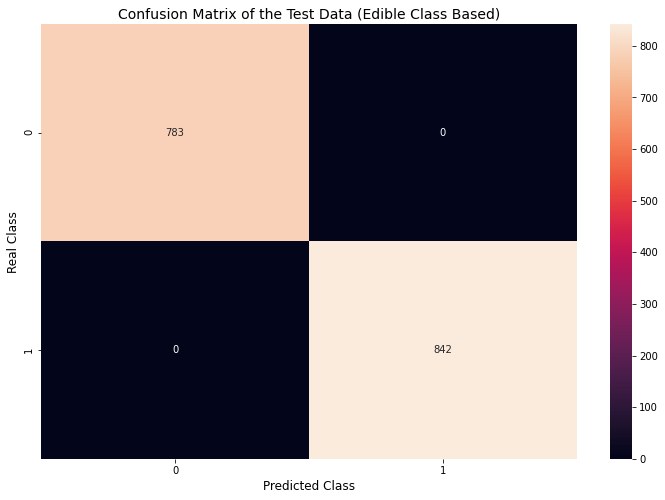

In [28]:
predictions_rf = pd.DataFrame(rf.predict(testX))
plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_true=testY['class_e'], y_pred=predictions_rf[0])
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Edible Class Based)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

**According to performance measurement of the model -model performed %100 accuracy-, I was expeding the see a "perfect" confusion matrix for the test dataset.**

# SVM

**For this step, I will train a SVM model for the observing the resuls.**

In [29]:
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(trainX, trainY['class_e'])

predictions_svm = clf.predict(testX)

acc_svm = accuracy_score(testY['class_e'], predictions_svm)
print('Accuracy of SVM Model: %', 100 * acc_svm)

Accuracy of SVM Model: % 100.0


**As seen from the output, the SVM Model also performed as well as the Random Forest Classifier.**

# XGBClassifier

**For this step, I will train a XGBC model for the observing the resuls.**

In [30]:
model = XGBClassifier(learning_rate=0.005, max_depth=10, n_estimators=30,
                      colsample_bytree=0.3, min_child_weight=0.5, reg_alpha=0.3,
                      )
model.fit(trainX, trainY['class_e'])

predictions_XGBC = model.predict(testX)
acc_XGBC = accuracy_score(predictions_XGBC, testY['class_e'])
print('----------------------------------------------------')
print('Accuracy of XGBClassifier: %', 100 * acc_XGBC)

[10:00:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----------------------------------------------------
Accuracy of XGBClassifier: % 100.0


**As seen from the results, the XGBClassifier also performed %100 accuracies. The XGBClassifier is tuned before the publish of this notebook.**

# Conclusions

**For the next step, I trained 3 different machine learning models which are Random Forest Classifier, SVM, and finally, XGBClassifier.**

**Due to the results of these machine learning models, I obtained %100 accuracy for each machine learning model. As far as I search about the Discussion Forum of this dataset, it is pretty common for everyone. And as far as analyzed the errors of the models, every 3 models do not perform overfitting.**

